# Training


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train_arr, y_train_arr), (x_test_arr, y_test_arr) = mnist.load_data()
x_train, x_test, y_train, y_test = tf.convert_to_tensor(x_train_arr), tf.convert_to_tensor(x_test_arr), tf.convert_to_tensor(y_train_arr), tf.convert_to_tensor(y_test_arr)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/jackson/code/dl/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

def loss_fn(predictions, labels):
    log_probs = tf.math.log(predictions + 1e-36)
    one_hot = tf.one_hot(labels, 10)
    losses = -tf.reduce_sum(one_hot * log_probs, axis=1)
    return tf.reduce_mean(losses)

pred_train = model(x_train)
loss_fn(pred_train, y_train)



<tf.Tensor: shape=(), dtype=float32, numpy=70.86911010742188>

We would expect a naive model to have a mean log probability of $log(1/10)\approx 2.3$. But in this case, we are getting a higher number, this is because the unutilized model is very confidently wrong. Therefore we get many logs of near 0 values. 

## The Gradient

How do we improve this linear model?

In [ ]:
with tf.GradientTape() as tape:
    pred_train = model(x_train)

    loss = loss_fn( pred_train, y_train)

gradients = tape.gradient(loss, model.trainable_variables)


Reshaped gradient shape: (28, 28, 10)


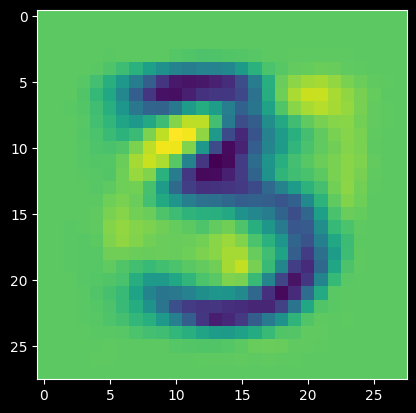

In [ ]:
# let's look at gradients



from matplotlib import pyplot as plt

reshaped_gradient = tf.reshape(gradients[0], (28, 28, 10))
print("Reshaped gradient shape:", reshaped_gradient.shape)

plt.imshow(reshaped_gradient[:,:, 3])